In [2]:
import os
import sys
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_validate

### Preprocessing

In [3]:
x_df = pd.read_csv('/train.csv')
x_df = x_df.drop(columns=['icustay id', 'Capillary refill rate', 'Glascow coma scale eye opening', 'Glascow coma scale motor response', 'Glascow coma scale verbal response'])

# data cleaning
x_df = x_df.drop(x_df[(x_df['Diastolic blood pressure'] < 0) |
                      (x_df['Diastolic blood pressure'] > 300) |
                      (x_df['Mean blood pressure'] < 0) |
                      (x_df['Mean blood pressure'] > 300) |
                      (x_df['Heart Rate'] <= 0) |
                      (x_df['Heart Rate'] > 300) |
                      (x_df['Height'] <= 0) |
                      (x_df['Height'] > 300) |
                      (x_df['Weight'] <= 0) |
                      (x_df['Weight'] > 300)].index)

# fill missing value
for column in list(x_df.columns[x_df.isna().sum() > 0]):
    mean_val = x_df[column].mean()
    x_df[column].fillna(mean_val, inplace=True)

# add bmi
x_df['bmi'] = x_df['Weight'] / np.sqrt(x_df['Height']/100)

y_df = x_df['label']
x_df = x_df.drop(columns=['label','Height', 'Weight'])

# min-max scaling
scaler = MinMaxScaler()
x_df[x_df.columns] = scaler.fit_transform(x_df[x_df.columns])

In [4]:
x = x_df.values
y = y_df.values

In [6]:
x_df

,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale total,Glucose,Heart Rate,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,pH,bmi
0,0.286822,0.477387,0.605032,0.014001,0.473684,0.309524,0.96,0.217391,0.501779,0.617593,0.074000,0.123253
1,0.178295,0.368801,1.000000,0.012701,0.432749,0.207483,0.94,0.165217,0.341637,0.600000,0.073700,0.194335
2,0.186047,0.368801,0.605032,0.013801,0.274854,0.244898,0.97,0.139130,0.409253,0.601852,0.070932,0.168375
3,0.201550,0.201005,0.605032,0.013701,0.380117,0.224490,0.99,0.078261,0.384342,0.610185,0.072600,0.161035
4,0.329457,0.368801,0.605032,0.014401,0.555556,0.326531,0.97,0.260870,0.469751,0.617593,0.074800,0.184244
...,...,...,...,...,...,...,...,...,...,...,...,...
17898,0.317829,0.502513,0.605032,0.014701,0.391813,0.295918,0.99,0.139130,0.512456,0.614815,0.065000,0.222512
17899,0.135659,0.201005,0.605032,0.018402,0.263158,0.207483,1.00,0.139130,0.487544,0.612963,0.073600,0.277016
17900,0.275194,0.368801,1.000000,0.008801,0.485380,0.282313,0.98,0.147826,0.444840,0.617593,0.055000,0.167542
17901,0.240310,0.368801,0.605032,0.011901,0.280702,0.248299,1.00,0.095652,0.405694,0.592593,0.074200,0.174682


In [5]:
x[0]

array([0.28682171, 0.47738693, 0.60503163, 0.0140014 , 0.47368421,
       0.30952381, 0.96      , 0.2173913 , 0.50177936, 0.61759259,
       0.074     , 0.12325276])

### Logistic Regression

In [7]:
logisticRegr = LogisticRegression(penalty='none',solver='saga',class_weight='balanced',max_iter=100,random_state=0)

scoring = ['precision', 'recall', 'roc_auc']
scores = cross_validate(logisticRegr, x, y, cv=5, scoring=scoring, return_train_score=False)

for key in scores.keys():
    print("%s: %0.4f (+/- %0.4f)" % (key, scores[key].mean(), scores[key].std()))

fit_time: 0.4022 (+/- 0.0329)
score_time: 0.0149 (+/- 0.0010)
test_precision: 0.1877 (+/- 0.0082)
test_recall: 0.5657 (+/- 0.0277)
test_roc_auc: 0.6338 (+/- 0.0161)


In [8]:
logisticRegr = LogisticRegression(penalty='l1',solver='saga',class_weight='balanced',max_iter=100,random_state=0)

scoring = ['precision', 'recall', 'roc_auc']
scores = cross_validate(logisticRegr, x, y, cv=5, scoring=scoring, return_train_score=False)

for key in scores.keys():
    print("%s: %0.4f (+/- %0.4f)" % (key, scores[key].mean(), scores[key].std()))

fit_time: 0.3971 (+/- 0.0298)
score_time: 0.0138 (+/- 0.0012)
test_precision: 0.1873 (+/- 0.0072)
test_recall: 0.5657 (+/- 0.0261)
test_roc_auc: 0.6327 (+/- 0.0167)


In [9]:
logisticRegr = LogisticRegression(penalty='l2',solver='saga',class_weight='balanced',max_iter=100,random_state=0)

scoring = ['precision', 'recall', 'roc_auc']
scores = cross_validate(logisticRegr, x, y, cv=5, scoring=scoring, return_train_score=False)

for key in scores.keys():
    print("%s: %0.4f (+/- %0.4f)" % (key, scores[key].mean(), scores[key].std()))

fit_time: 0.1534 (+/- 0.0028)
score_time: 0.0140 (+/- 0.0013)
test_precision: 0.1868 (+/- 0.0080)
test_recall: 0.5661 (+/- 0.0317)
test_roc_auc: 0.6304 (+/- 0.0169)


In [10]:
logisticRegr = LogisticRegression(penalty='elasticnet',solver='saga',class_weight='balanced',l1_ratio=0.5, max_iter=100,random_state=0)

scoring = ['precision', 'recall', 'roc_auc']
scores = cross_validate(logisticRegr, x, y, cv=5, scoring=scoring, return_train_score=False)

for key in scores.keys():
    print("%s: %0.4f (+/- %0.4f)" % (key, scores[key].mean(), scores[key].std()))

fit_time: 0.2244 (+/- 0.0139)
score_time: 0.0130 (+/- 0.0010)
test_precision: 0.1869 (+/- 0.0083)
test_recall: 0.5640 (+/- 0.0308)
test_roc_auc: 0.6312 (+/- 0.0169)


### SVM

In [13]:
svm = SVC(C=1, kernel='linear', class_weight='balanced', max_iter=10000, random_state=0)

scoring = ['precision', 'recall', 'roc_auc']
scores = cross_validate(svm, x, y, cv=5, scoring=scoring, return_train_score=False)

for key in scores.keys():
    print("%s: %0.4f (+/- %0.4f)" % (key, scores[key].mean(), scores[key].std()))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_it

fit_time: 9.1505 (+/- 2.4166)
score_time: 2.7888 (+/- 0.7405)
test_precision: 0.1353 (+/- 0.0002)
test_recall: 0.9975 (+/- 0.0050)
test_roc_auc: 0.6195 (+/- 0.0193)


In [14]:
svm = SVC(C=1, kernel='rbf', class_weight='balanced', max_iter=10000, random_state=0)

scoring = ['precision', 'recall', 'roc_auc']
scores = cross_validate(svm, x, y, cv=5, scoring=scoring, return_train_score=False)

for key in scores.keys():
    print("%s: %0.4f (+/- %0.4f)" % (key, scores[key].mean(), scores[key].std()))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_it

fit_time: 11.7826 (+/- 0.1360)
score_time: 5.5494 (+/- 0.0285)
test_precision: 0.1363 (+/- 0.0016)
test_recall: 0.9959 (+/- 0.0073)
test_roc_auc: 0.6346 (+/- 0.0126)


In [15]:
svm = SVC(C=1, kernel='poly', class_weight='balanced', degree=3, max_iter=10000, random_state=0)

scoring = ['precision', 'recall', 'roc_auc']
scores = cross_validate(svm, x, y, cv=5, scoring=scoring, return_train_score=False)

for key in scores.keys():
    print("%s: %0.4f (+/- %0.4f)" % (key, scores[key].mean(), scores[key].std()))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_it

fit_time: 7.1775 (+/- 0.1849)
score_time: 2.5310 (+/- 0.1600)
test_precision: 0.1411 (+/- 0.0012)
test_recall: 0.9029 (+/- 0.0233)
test_roc_auc: 0.5726 (+/- 0.0171)


### Tree

In [16]:
cart = DecisionTreeClassifier(criterion='entropy', max_depth=7, class_weight='balanced', random_state=0)

scoring = ['precision', 'recall', 'roc_auc']
scores = cross_validate(cart, x, y, cv=5, scoring=scoring, return_train_score=False)

for key in scores.keys():
    print("%s: %0.4f (+/- %0.4f)" % (key, scores[key].mean(), scores[key].std()))

fit_time: 0.0790 (+/- 0.0026)
score_time: 0.0101 (+/- 0.0009)
test_precision: 0.2068 (+/- 0.0138)
test_recall: 0.5731 (+/- 0.0374)
test_roc_auc: 0.6488 (+/- 0.0083)


In [17]:
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10, random_state=0)

scoring = ['precision', 'recall', 'roc_auc']
scores = cross_validate(rf, x, y, cv=5, scoring=scoring, return_train_score=False)

for key in scores.keys():
    print("%s: %0.4f (+/- %0.4f)" % (key, scores[key].mean(), scores[key].std()))

fit_time: 1.8152 (+/- 0.0177)
score_time: 0.1258 (+/- 0.0037)
test_precision: 0.2733 (+/- 0.2687)
test_recall: 0.0017 (+/- 0.0015)
test_roc_auc: 0.7114 (+/- 0.0126)


In [18]:
gbdt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=0)

scoring = ['precision', 'recall', 'roc_auc']
scores = cross_validate(gbdt, x, y, cv=5, scoring=scoring, return_train_score=False)

for key in scores.keys():
    print("%s: %0.4f (+/- %0.4f)" % (key, scores[key].mean(), scores[key].std()))

fit_time: 4.5670 (+/- 0.2568)
score_time: 0.0262 (+/- 0.0010)
test_precision: 0.3834 (+/- 0.0399)
test_recall: 0.0421 (+/- 0.0076)
test_roc_auc: 0.7171 (+/- 0.0114)


### K-Means

In [19]:
kms = KMeans(n_clusters=2, random_state=0).fit(x)
score = roc_auc_score(y, kms.labels_)
print("%s: %0.4f" % ('kmeans', score))

kmeans: 0.5346


In [20]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y, kms.labels_)
recall = recall_score(y, kms.labels_)

In [21]:
precision

0.1733088620870477

In [22]:
recall

0.2731404958677686

In [23]:
x.shape

(17874, 12)

### t-SNE

In [24]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
label = []
for i in range(len(y)):
    if y[i] == 0:
        label.append('Survive')
    elif y[i] == 1:
        label.append('Death')

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:882: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


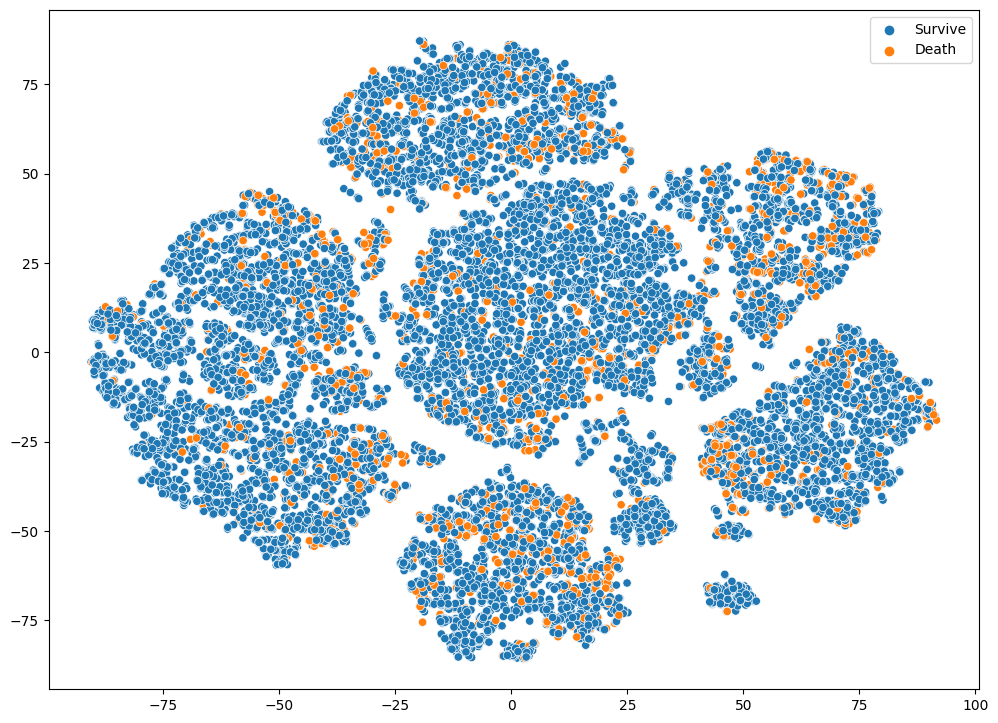

In [26]:
# latent = x
# scaler = MinMaxScaler()
# scaler.fit(latent)
# latent = scaler.transform(x)
X_embedded = TSNE(n_components=2, init='pca', random_state=351, perplexity=20).fit_transform(x)

plt.figure(figsize=[12,9],dpi=100)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=label, data=X_embedded)
fig = plt.gcf()
# plt.savefig(save_dir+'/tsne.png', dpi=200)
plt.show()

In [27]:
x.shape

(17874, 12)

In [ ]:
x